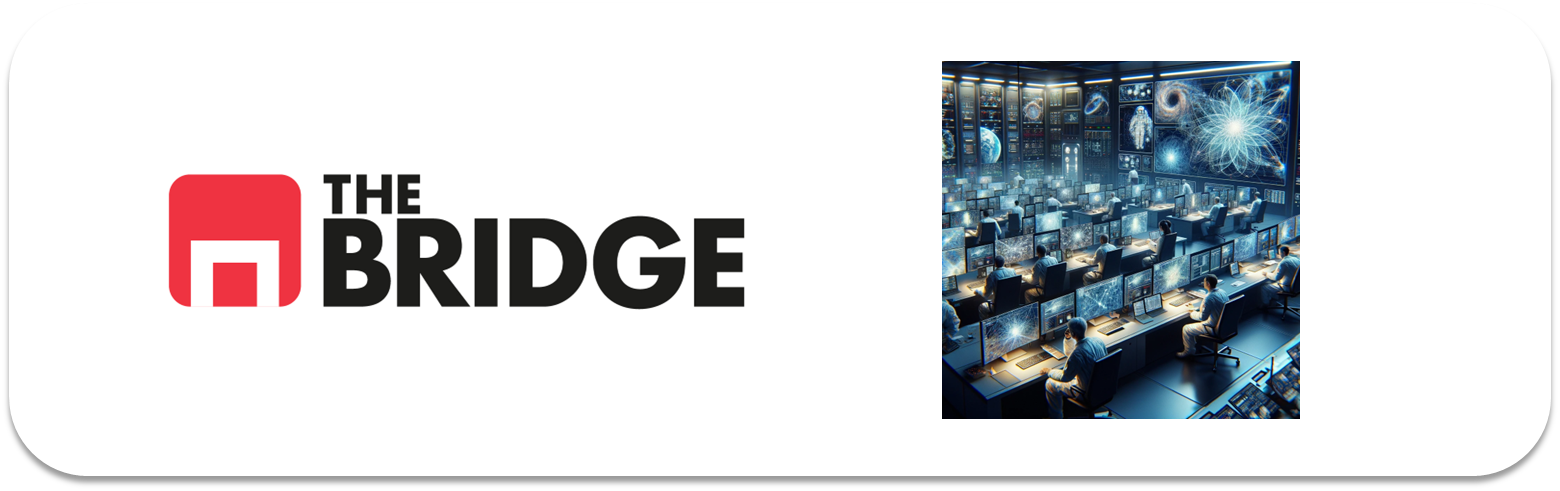

## PRACTICA OBLIGATORIA: **Redes Convolucionales**

* La práctica obligatoria de esta unidad consiste en un ejercicio de construcción de una red convolucional con Keras para la clasificación de imagenes de simpáticos perretes y gatetes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from skimage.io import imread
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.metrics import confusion_matrix
import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

### Problema de Negocio y dataset

Una conocida empresa de información inmobiliaria utiliza un CAPTCHA visual de perros y gatos para detectar webscrappings intensivos y ataques de denegación de servicio. Últimamente, ha detectado que su sistema está empezando a flojear, es decir que hay muchos sistemas de detección automática de imágenes que son capaces de detectar que es un perro y un gato y salterse el CAPTCHA antirobots. Por eso nos ha pedido que entrenemos un modelo potente de clasificación que emule a estos sistemas con el objetivo de emplear como fotografías para el CAPTCHA aquellas que no sepa detectar este sistema emulador de chicos malos.  

Pues manos a la obra, tenemos que seleccionar en un conjunto de 1000 imágenes aquellas que peor se le daría clasificar a un potencial sistema anti-CAPTCHA.  

Para ello vamos a emplear un conjunto de train de 4000 imágenes de perretes y gatetes que se encuentran distribuidas en "data" en cuatro directorios "github_train_0",  "github_train_1", "githun_train_2" y "github_train_3". Los datos de las imagenes que tenemos que clasificar y luego seleccionar como las más "difíciles" están en "data" en el directorio "github_test".


### Se pide

1. Crear los datasets X,y de train y test, leyendo las imágenes de los directorios correspondientes (tendrás que leer todas las imágenes de los cuatro directorios para train) y a la vez que se leen adpatar su resolución para que todas tengan un tamaño de 32x32. En este caso puedes adaptar las funciones de los ejercicios de la unidad. NOTA: Ten en cuenta que la clase a la que pertenece en la foto está en el nombre del archivo.

2. Crea un modelo DL basado en redes convolucionales con al menos dos juegos Convolucional-Pooling. Sigue todo el proceso de ML (visualización del dataset, MiniEDA, Construcción del modelo)

3. Entrenar el modelo con un callback de Earlystopping con paciencia la que tengas :-). Muestra su historial de entrenamiento.

4. Evalua el modelo, haz un reporte de clasificacion y muestra la matriz de confianza.

5. Es el momento de seleccionar las imagenes: Selecciona el 10% de imágenes mal clasificadas de una y otra clase que tengan el mayor nivel de confianza de que pertenencían a la clase errónea. Es decir las imágenes de perros clasificadas como gatos y con la probabilidad de ser perror más alta.


### Extra (para hacer en clase)

Repite los pasos 3 a 5 utilizando el generador de imágenes sintéticas o Image Augmentation de Keras. 



In [3]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        img = img.resize((32, 32))  # Redimensionamos todas las imágenes a 32x32
        if img is not None:
            images.append(np.array(img))
    return images

# Cargar las imágenes de entrenamiento
X_train = []
y_train = []
for i in range(4):
    folder = f"data/github_train_{i}"
    images = load_images_from_folder(folder)
    X_train.extend(images)
    labels = [i] * len(images)
    y_train.extend(labels)

# Cargar las imágenes de prueba
folder = "data/github_test"
X_test = load_images_from_folder(folder)

In [4]:
# Convertir a arrays numpy y escalar los valores de píxeles a un rango de 0 a 1
X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0

# Convertir etiquetas a arrays numpy
y_train = np.array(y_train)

# Dividir los datos de entrenamiento en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [10]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 2, 2, 128)        

Epoch 1/20
100/100 [==============================] - 1s 7ms/step - loss: -193545.7188 - accuracy: 0.2456 - val_loss: -1208939.8750 - val_accuracy: 0.2663
Epoch 2/20
100/100 [==============================] - 1s 6ms/step - loss: -34003036.0000 - accuracy: 0.2459 - val_loss: -111011632.0000 - val_accuracy: 0.2663
Epoch 3/20
100/100 [==============================] - 1s 6ms/step - loss: -630715776.0000 - accuracy: 0.2459 - val_loss: -1306578176.0000 - val_accuracy: 0.2663
Epoch 4/20
100/100 [==============================] - 1s 6ms/step - loss: -4115887872.0000 - accuracy: 0.2459 - val_loss: -7025191936.0000 - val_accuracy: 0.2663
Epoch 5/20
100/100 [==============================] - 1s 6ms/step - loss: -17138697216.0000 - accuracy: 0.2459 - val_loss: -24312627200.0000 - val_accuracy: 0.2663
Epoch 6/20
100/100 [==============================] - 1s 6ms/step - loss: -49878347776.0000 - accuracy: 0.2459 - val_loss: -63683055616.0000 - val_accuracy: 0.2663
Epoch 7/20
100/100 [===============

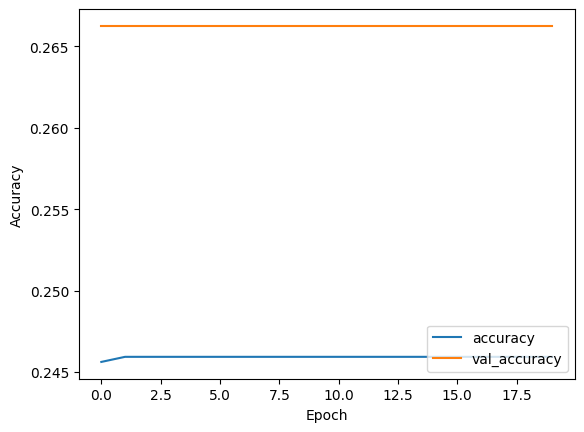

In [11]:
early_stopping = EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Mostrar historial de entrenamiento
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

32/32 [==============================] - 0s 2ms/step - loss: 24553625485312.0000 - accuracy: 0.5000
Test Accuracy: 0.5
32/32 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       500
           1       0.00      0.00      0.00       500

    accuracy                           0.50      1000
   macro avg       0.25      0.50      0.33      1000
weighted avg       0.25      0.50      0.33      1000



c:\Users\alvar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alvar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\alvar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

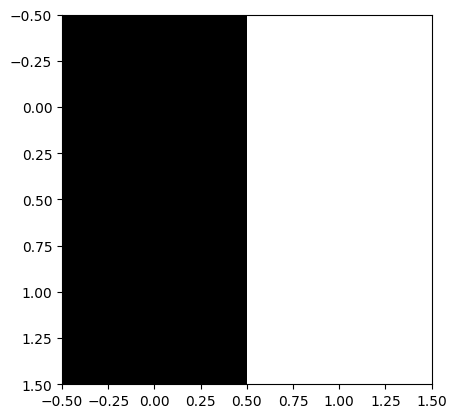

In [13]:
# Dividir los datos de prueba en características y etiquetas
y_test = []
for filename in os.listdir(folder):
    if filename.startswith("cat"):
        y_test.append(0)
    elif filename.startswith("dog"):
        y_test.append(1)
y_test = np.array(y_test)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Reporte de clasificación
print(classification_report(y_test, y_pred_classes))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.imshow(conf_matrix, cmap='binary', interpolation='None')
plt.show()

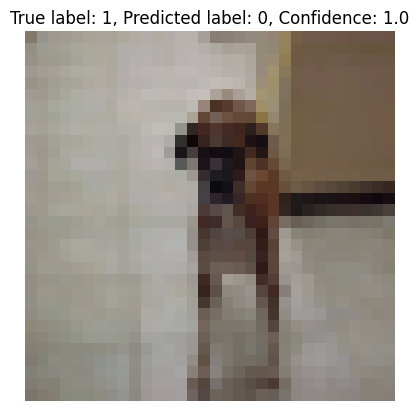

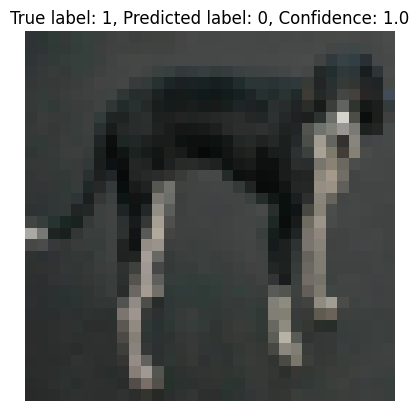

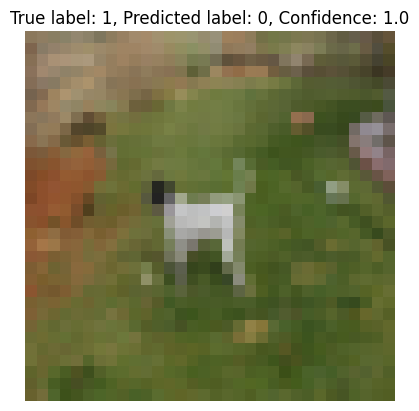

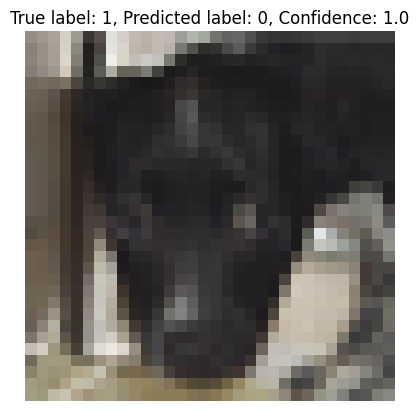

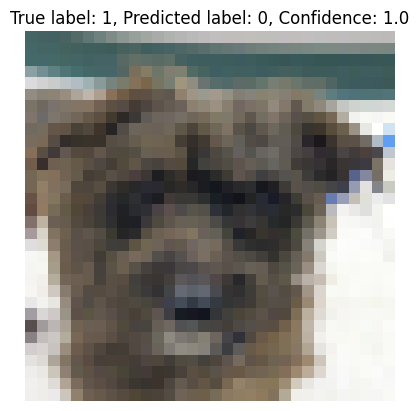

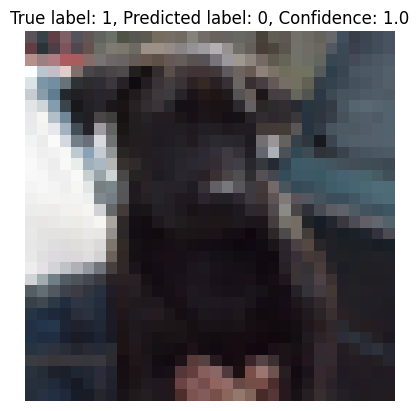

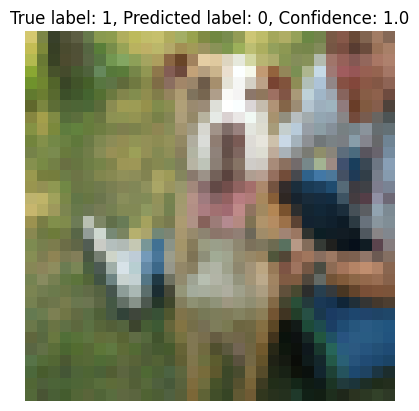

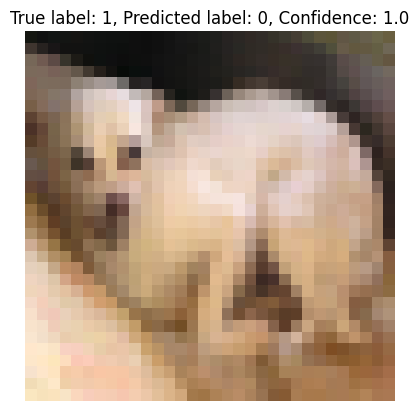

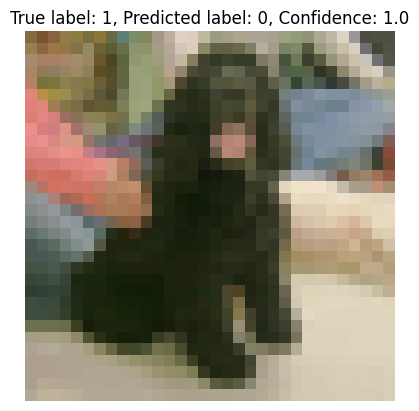

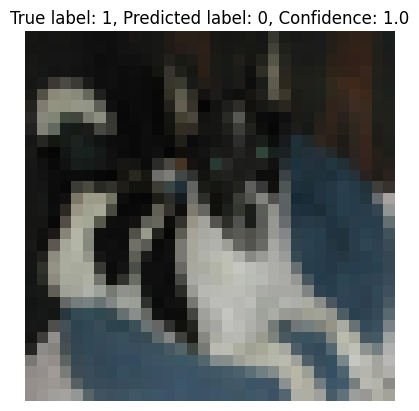

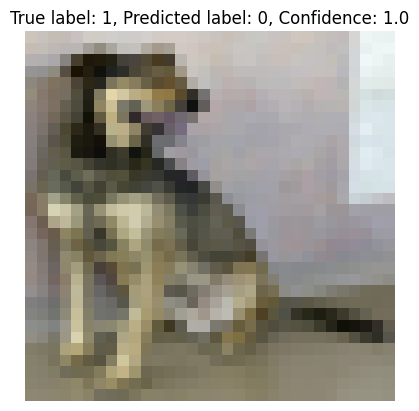

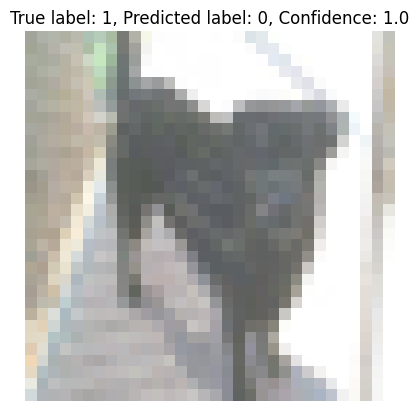

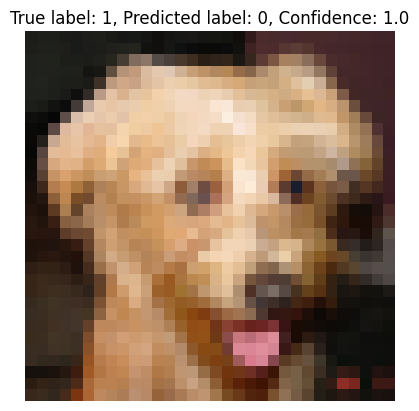

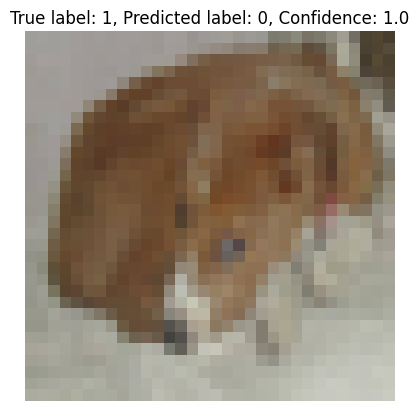

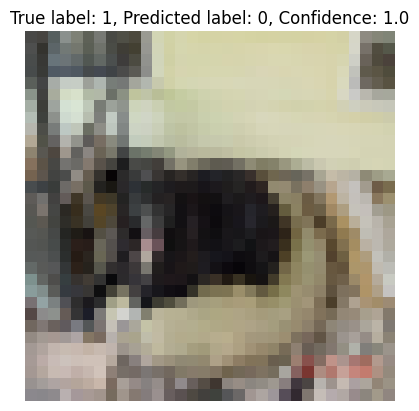

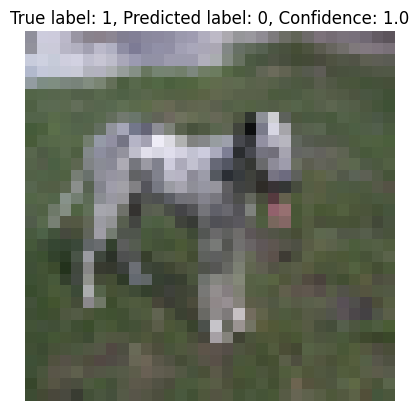

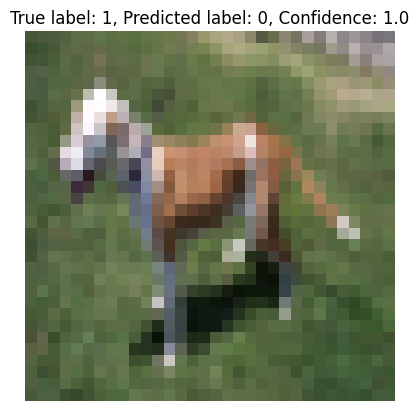

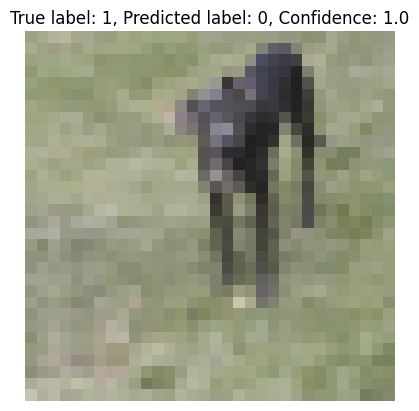

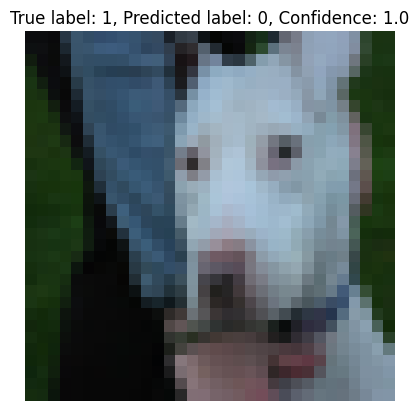

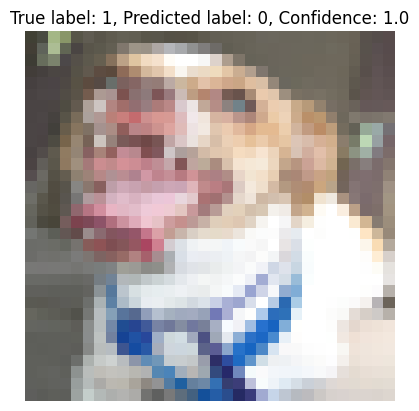

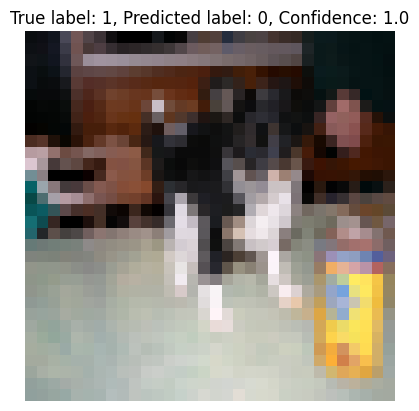

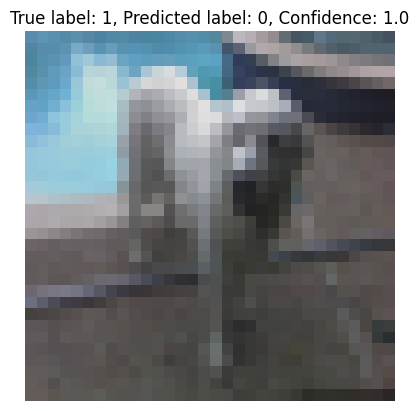

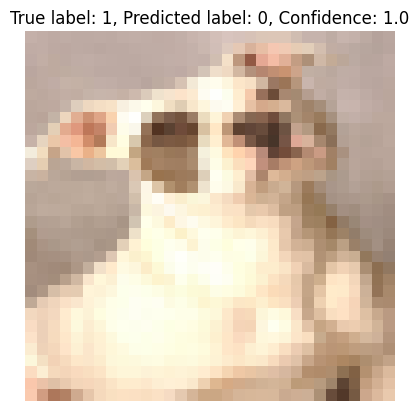

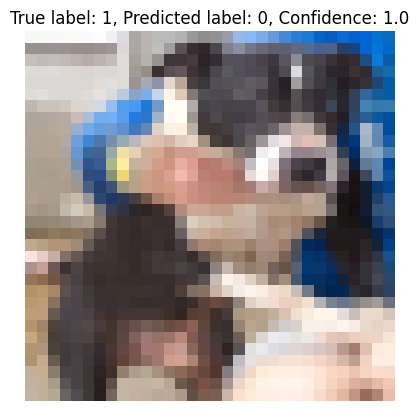

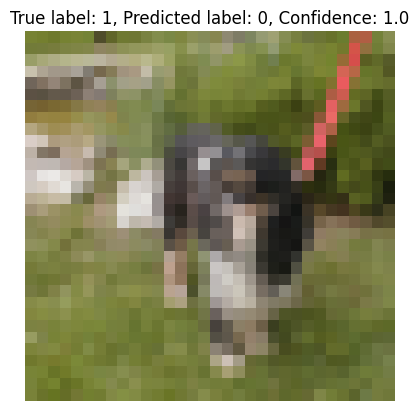

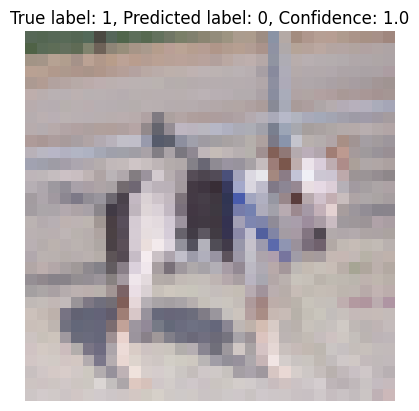

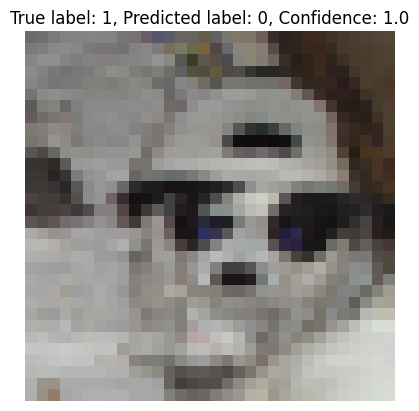

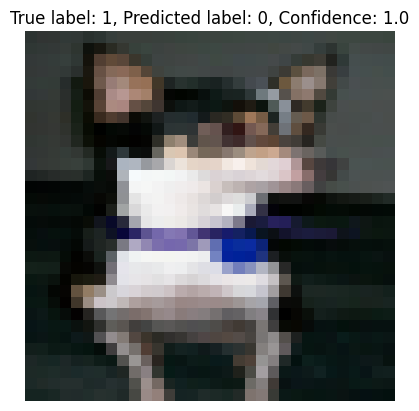

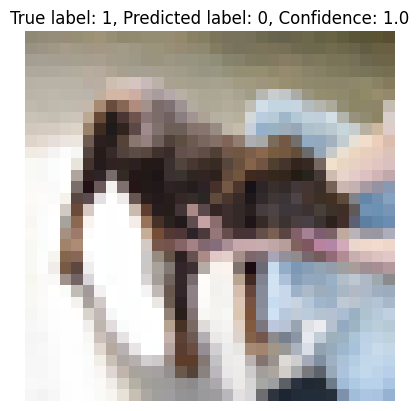

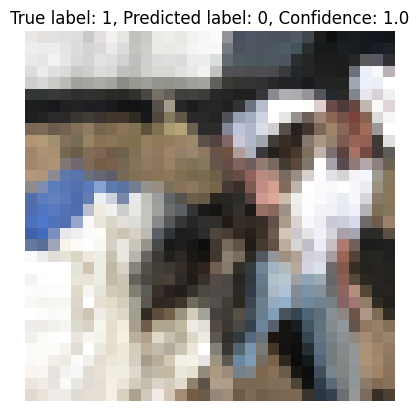

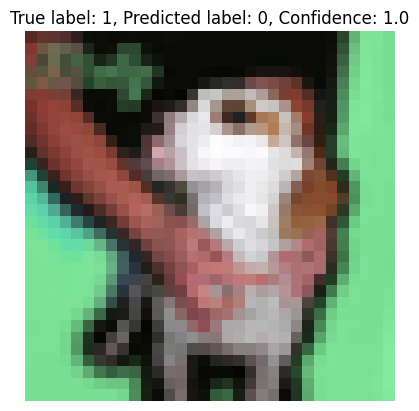

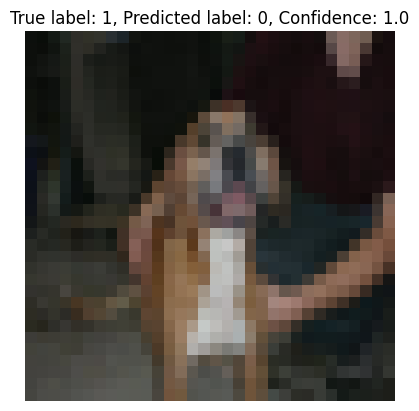

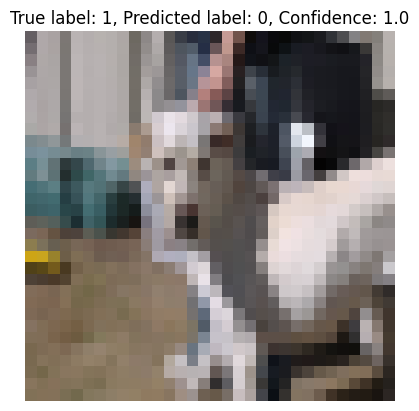

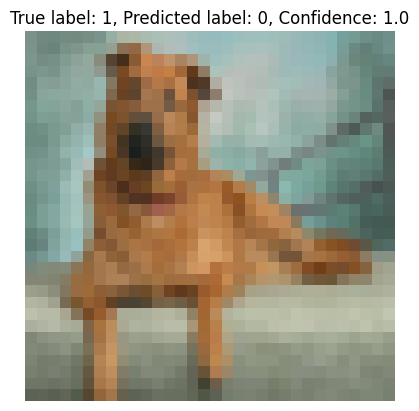

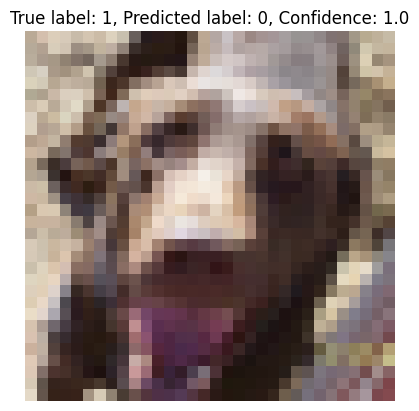

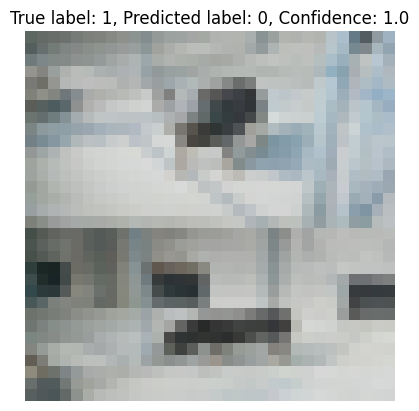

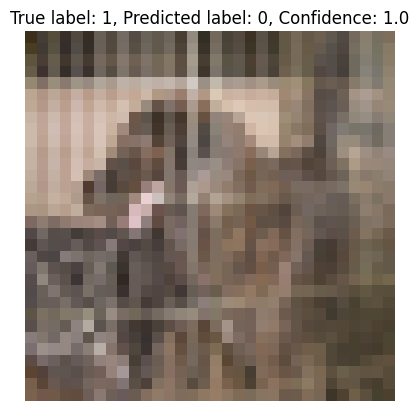

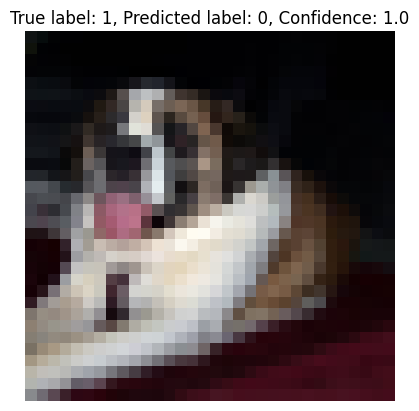

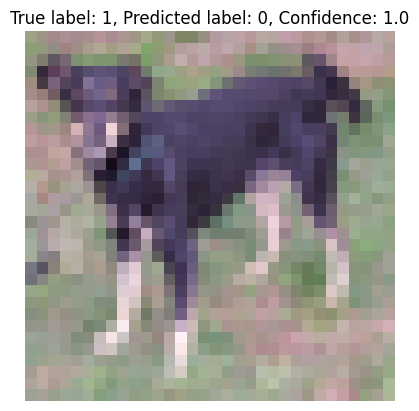

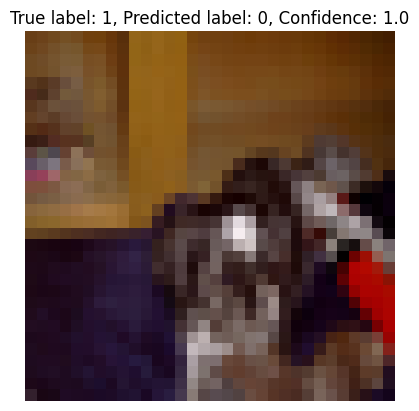

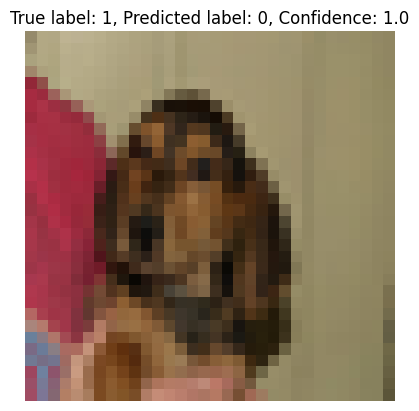

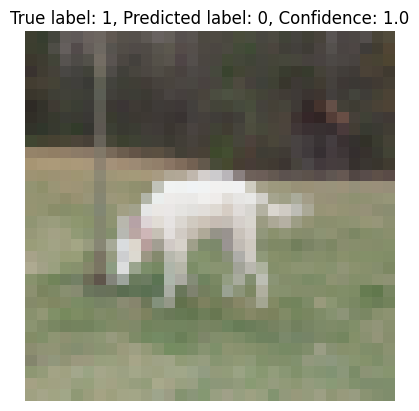

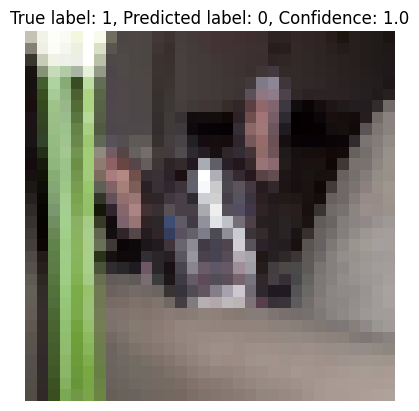

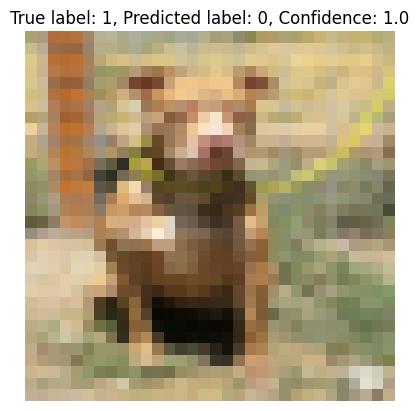

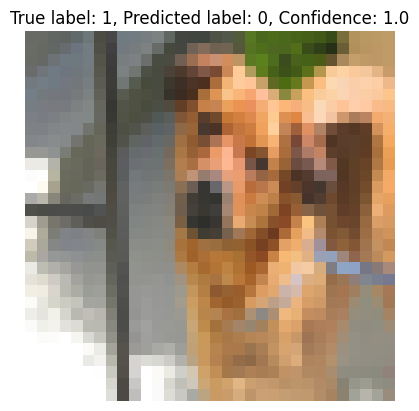

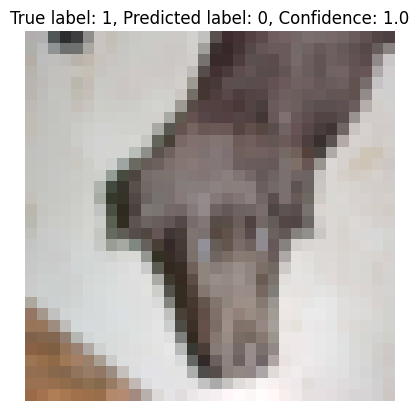

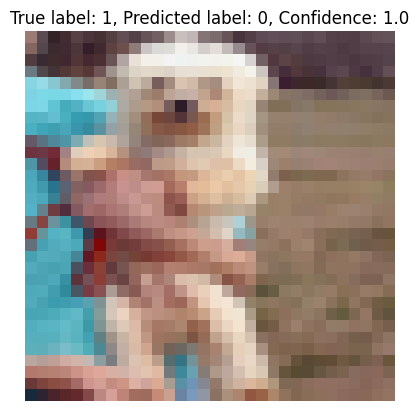

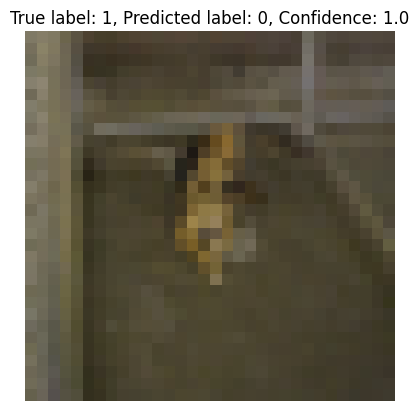

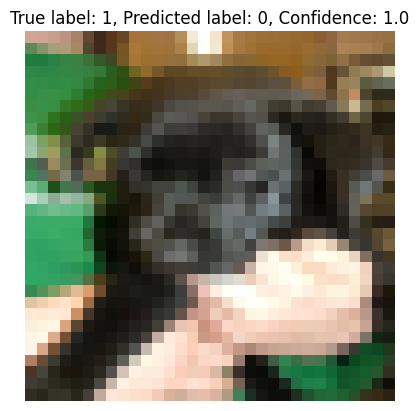

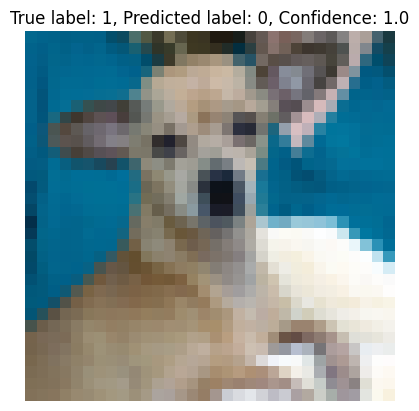

In [14]:
# Seleccionar las imágenes mal clasificadas con mayor confianza
incorrect_images = []
for i in range(len(X_test)):
    if y_test[i] != y_pred_classes[i]:
        confidence = y_pred[i][y_pred_classes[i]]
        incorrect_images.append((X_test[i], y_test[i], y_pred_classes[i], confidence))

# Ordenamos las imágenes mal clasificadas por la confianza de la predicción incorrecta
incorrect_images.sort(key=lambda x: x[3], reverse=True)

# Seleccionar el 10% de las imágenes mal clasificadas de cada clase con mayor confianza
num_selected = int(len(incorrect_images) * 0.1)
selected_images = incorrect_images[:num_selected]

# Mostrar las imágenes seleccionadas
for img, true_label, pred_label, confidence in selected_images:
    plt.imshow(img)
    plt.title(f"True label: {true_label}, Predicted label: {pred_label}, Confidence: {confidence}")
    plt.axis('off')
    plt.show()